In [1]:
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Portfolio import Portfolio
from Treasury import Treasury
import pandas as pd

Max sharpe ratio: 0.7029876596340302
Max sharpe ratio portfolio annualized log return: 0.10061665841534906
Max sharpe ratio portfolio annualized volatility of log returns: 0.07236907479573673
Max sharpe ratio portfolio weights: [ 0.25433244  0.5         0.14692186  0.13089813 -0.13575688 -0.12347097
 -0.5        -0.00139941  0.5        -0.11482373  0.5        -0.15670144]

                                GLD            SPY            XLE  \
                     GLD Log Return SPY Log Return XLE Log Return   
GLD  GLD Log Return        0.029527       0.000830       0.005836   
SPY  SPY Log Return        0.000830       0.035687       0.041800   
XLE  XLE Log Return        0.005836       0.041800       0.089086   
XLY  XLY Log Return       -0.001012       0.037689       0.039160   
CL1  CL1 Log Return        0.013666       0.022063       0.062158   
GC1  GC1 Log Return        0.025434      -0.000261       0.003702   
ES1  ES1 Log Return        0.000861       0.035970       0.042304   
NG1

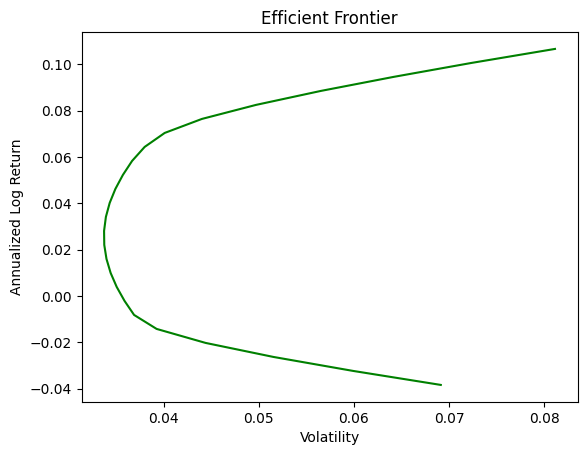

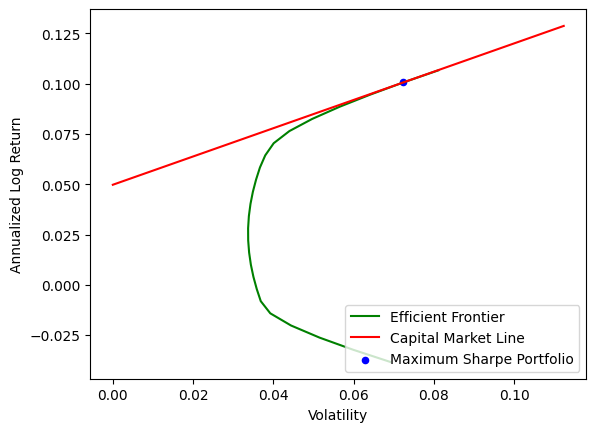

In [2]:
def get_risk_free_rate(dateString):
    df = pd.read_csv("../Data/TreasuryData/Cleaned-Data/cleaned_treasury_data.csv")
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    halfYear = df["6 Mo"].to_frame()
    rf = halfYear.loc[dateString, '6 Mo']
    rf = rf / 100
    return rf


etfBND = ETF("BND")
etfDBC = ETF("DBC")
etfGLD = ETF("GLD")
etfQQQ = ETF("QQQ")
etfSPY = ETF("SPY")
etfXLB = ETF("XLB")
etfXLE = ETF("XLE")
etfXLF = ETF("XLF")
etfXLI = ETF("XLI")
etfXLK = ETF("XLK")
etfXLP = ETF("XLP")
etfXLU = ETF("XLU")
etfXLV = ETF("XLV")
etfXLY = ETF("XLY")
futureCL1 = Future("CL1")
futureDX1 = Future("DX1")
futureES1 = Future("ES1")
futureFF1 = Future("FF1")
# Skipped FF4
futureGC1 = Future("GC1")
futureNG1 = Future("NG1")
futureSI1 = Future("SI1")
treasurySixMonth = Treasury("0.5")
treasuryOneYear = Treasury("1.0")
treasuryTwoYear = Treasury("2.0")
treasuryThreeYear = Treasury("3.0")
treasuryFiveYear = Treasury("5.0")
treasurySevenYear = Treasury("7.0")
treasuryTenYear = Treasury("10.0")
treasuryThirtyYear = Treasury("30.0")
all_assets = [
    etfBND, etfDBC, etfGLD, etfQQQ, etfSPY, etfXLB, etfXLE, etfXLF, etfXLI,
    etfXLK, etfXLP, etfXLU, etfXLV, etfXLY,
    futureCL1, futureDX1, futureES1, futureFF1, futureGC1, futureNG1, futureSI1,
    treasurySixMonth, treasuryOneYear, treasuryTwoYear, treasuryThreeYear,
    treasuryFiveYear, treasurySevenYear, treasuryTenYear, treasuryThirtyYear
]

subset = [
    etfGLD, etfSPY, etfXLE, etfXLY,
    futureCL1, futureGC1, futureES1, futureNG1, treasuryTwoYear,
    treasuryFiveYear, treasuryTenYear, treasuryThirtyYear
]

portfolio1 = Portfolio(subset, rf=get_risk_free_rate("2007-04-11"), equity_benchmark=etfSPY, future_benchmark=etfDBC, treasury_benchmark=treasurySixMonth)
max_sharpe_ratio, ret, vol, weights = portfolio1.plot_ef(n_points=25)
print("Max sharpe ratio: " + str(max_sharpe_ratio))
print("Max sharpe ratio portfolio annualized log return: " + str(ret))
print("Max sharpe ratio portfolio annualized volatility of log returns: " + str(vol))
print("Max sharpe ratio portfolio weights: " + str(weights))
print()
print(portfolio1.annualized_covariance_matrix())
print()
print(portfolio1.annualized_portfolio_vol(weights))



In [3]:
print(portfolio1.asset_log_returns_df)

                      GLD            SPY            XLE            XLY  \
           GLD Log Return SPY Log Return XLE Log Return XLY Log Return   
2007-05-08      -0.005436      -0.001326       0.000154      -0.004313   
2007-05-09      -0.006355       0.002717      -0.000463       0.006083   
2007-05-10      -0.021732      -0.010508      -0.016337      -0.010926   
2007-05-11       0.006795       0.008521       0.022644       0.004080   
2007-05-14      -0.002562      -0.002190       0.000307       0.000000   
...                   ...            ...            ...            ...   
2024-11-13      -0.010132       0.000486       0.007754       0.008508   
2024-11-14      -0.002613      -0.006451       0.003802      -0.014297   
2024-11-15      -0.001774      -0.012891      -0.001477      -0.008584   
2024-11-18       0.018842       0.004089       0.013213       0.009187   
2024-11-19       0.008919       0.003649      -0.006375       0.000743   

                      CL1            